In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [89]:
def explit(T,l,k,N,args1,args2, phi0, phil, ksi, f):
    tau = T/k
    h = l/(N-1)
    n = []
    tmp = []
    for i in range(N):
        tmp.append(ksi(i*h))
    n.append(tmp)
    print(n)
    for t in range(1,k):
        tmp = list(np.zeros(N))
        for x in range(1,N-1):
            tmp[x] = (n[t-1][x-1]*(args1[0]/(h*h) - args1[1]/(2*h))+ n[t-1][x]*(args1[2] - 2*args1[0]/(h*h)) + n[t-1][x+1]*(args1[0]/(h*h) + args1[1]/(2*h)) + f(x*h,t*tau)) *tau + n[t-1][x]
        if args2[0] == 0 :
            tmp[0]=phi0(t*tau)
        else:
            tmp[0]= (-tmp[1]*(args2[0]/h)+phi0(t*tau))/(args2[1] - args2[0]/h)
            
        if args2[2] == 0 : 
            tmp[-1]=phil(t*tau)
        else:
            tmp[-1]=(tmp[-2]*(args2[2]/h)+phil(t*tau))/(args2[3] + args2[2]/h)
    
        n.append(tmp)
        res_ex = pd.DataFrame(n)
        res_ex.to_csv('res_ex.csv')
    return n


def implit(T,l,k,N,args1,args2, phi0, phil, ksi, f):
    tau = T/k
    h = l/(N-1)
    n = []
    sys = np.zeros((N,N))
    tmp = []
    for i in range(N):
        tmp.append(ksi(i*h))
    n.append(tmp)
    print(n)
    for i in range(1,N-1):
        sys[i][i-1] = -(args1[0]/(h*h) - args1[1]/(2*h))*tau
        sys[i][i] = -(-1+args1[2] - 2*args1[0]/(h*h))*tau
        sys[i][i+1] =-(args1[0]/(h*h) + args1[1]/(2*h))*tau
    sys[0][0] =  args2[1] - args2[0]/h  
    sys[0][1] = args2[0]/h
    sys[-1][-2] = -args2[2]/h
    sys[-1][-1] = args2[3] + args2[2]/h
    #sys[0][0] = -(-1+args1[2] - 2*args1[0]/(h*h))*tau
    #sys[0][1] = -(args1[0]/(h*h) + args1[1]/(2*h))*tau
    #sys[-1][-1] = -(-1+args1[2] - 2*args1[0]/(h*h))*tau
    #sys[-1][-2] =-(args1[0]/(h*h) - args1[1]/(2*h))*tau
    
    for t in range(1,k):
        tmp = list(np.zeros(N))
        for x in range(1,N-1):
            tmp[x] = -n[t-1][x] - f(x*h,t*tau)*tau
        tmp[0] = phi0(t*tau)
        tmp[-1] =phil(t*tau)
        #tmp[0] = (phi0(t*tau) - (args2[0]/h)*n[t-1][1])/(args2[1] - args2[0]/h) + f(x*h,t*tau)*tau
        #tmp[-1] =(phil(t*tau) + (args2[2]/h)*n[t-1][-2])/(args2[3] + args2[2]/h) + f(x*h,t*tau)*tau
        n.append(list(np.linalg.solve(sys,tmp)))
        res_im = pd.DataFrame(n)
        res_im.to_csv('res_im.csv')
    return n


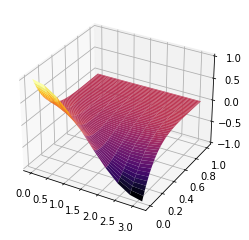

In [69]:
t1, x1 = np.mgrid[0:1:100j, 0:np.pi:10j]

z1 = np.exp(-5*t1)*np.cos(x1 +3*t1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, t1, z1, cmap='inferno')
plt.show()

[[1.0, 0.9396926207859084, 0.766044443118978, 0.5000000000000001, 0.17364817766693041, -0.1736481776669303, -0.4999999999999998, -0.7660444431189779, -0.9396926207859083, -1.0]]


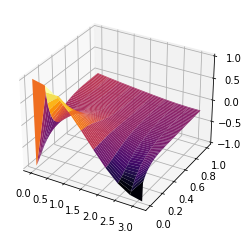

In [ ]:
t1, x1 = np.mgrid[0:1:100j, 0:np.pi:10j]
z2 = np.array(explit(1,np.pi,100,10,[5,3,0], [1,-1,1,-1],
          lambda t: -np.exp(-5*t)*(np.cos(3*t) + np.sin(3*t)),lambda t:np.exp(-5*t)*(np.cos(3*t) + np.sin(3*t)), lambda x:np.cos(x), lambda x,t: 0))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, t1, z2, cmap='inferno')
plt.show()

In [91]:
def explit(T,l,k,N,args1,args2, phi0, phil, ksi, f):
    tau = T/k
    h = l/(N-1)
    n = []
    tmp = []
    sigma = (args1[0]**2*tau) / (h ** 2)
    for i in range(N):
        tmp.append(ksi(i*h))
    n.append(tmp)
    print(n)
    for t in range(1,k):
        tmp = list(np.zeros(N))
        for x in range(1,N-1):
            tmp[x] = sigma * n[t - 1][x + 1] + (1 - 2 * sigma) * n[t - 1][x] + sigma * n[t - 1][x - 1] + tau * f(x * h, t * tau)
        tmp[0] = phi0(t * tau)
        tmp[-1] = (phil(t * tau) + tmp[-2] / h + 2 * tau * n[t - 1][-1] / h) / (1 / h + 2 * tau / h)
        n.append(tmp)
    return n